In [2]:
# Loading functions and packages (4D models used for Lorenz with zero 4th dimension) 
from DySMHO_higherDim.model import model_4D
from DySMHO_higherDim.data import Lorenz_zero4D_data_generation
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt

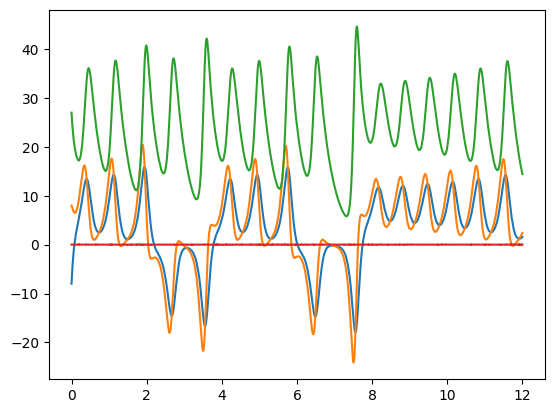



--------------------------- Smoothing data ---------------------------


Prev STD: 0.00126 - New STD: 0.00125 - Percent change: -1.32311
No smoothing applied


Prev STD: 0.00142 - New STD: 0.00141 - Percent change: -0.60051
No smoothing applied


Prev STD: 0.00198 - New STD: 0.00197 - Percent change: -0.40763
No smoothing applied


Prev STD: 0.17853 - New STD: 0.03096 - Percent change: -82.65668
Prev STD: 0.03096 - New STD: 0.01469 - Percent change: -52.56064
Prev STD: 0.01469 - New STD: 0.00951 - Percent change: -35.23179
Prev STD: 0.00951 - New STD: 0.00708 - Percent change: -25.62917
Prev STD: 0.00708 - New STD: 0.00564 - Percent change: -20.31198
Prev STD: 0.00564 - New STD: 0.00461 - Percent change: -18.25361
Prev STD: 0.00461 - New STD: 0.00393 - Percent change: -14.64515
Prev STD: 0.00393 - New STD: 0.00345 - Percent change: -12.26945
Prev STD: 0.00345 - New STD: 0.00303 - Percent change: -12.07877
Prev STD: 0.00303 - New STD: 0.00275 - Percent change: -9.25838
Smoothing windo

IndexError: list index out of range

In [4]:
# Define initial conditions for the 3 states 
y_init = [-8, 8, 27, 0]

# Horizon length for optimization problem (arbitrary time units) 
horizon_length = 2 

# Number of sampling time periods taken per MHE step
time_steps = 10  


# Basis functions for dynamics of state 1 
basis_functions_y0 = [lambda y0, y1, y2, y3: 1, 
                      lambda y0, y1, y2, y3: y0,
                      lambda y0, y1, y2, y3: y1,
                      lambda y0, y1, y2, y3: y2,  
                      lambda y0, y1, y2, y3: y3,
                      lambda y0, y1, y2, y3: y0*y1,
                      lambda y0, y1, y2, y3: y0*y2,
                      lambda y0, y1, y2, y3: y0*y3,
                      lambda y0, y1, y2, y3: y1*y2,
                      lambda y0, y1, y2, y3: y1*y3,
                      lambda y0, y1, y2, y3: y2*y3,
                      lambda y0, y1, y2, y3: y0**2,
                      lambda y0, y1, y2, y3: y1**2,
                      lambda y0, y1, y2, y3: y2**2,
                      lambda y0, y1, y2, y3: y3**2,
                      lambda y0, y1, y2, y3: (y0**2)*y1,
                      lambda y0, y1, y2, y3: y0*(y1**2),
                      lambda y0, y1, y2, y3: (y0**2)*y2,
                      lambda y0, y1, y2, y3: y0*(y2**2),
                      lambda y0, y1, y2, y3: (y0**2)*y3,
                      lambda y0, y1, y2, y3: y0*(y3**2),
                      lambda y0, y1, y2, y3: (y1**2)*y2,
                      lambda y0, y1, y2, y3: y1*(y2**2),
                      lambda y0, y1, y2, y3: (y1**2)*y3,
                      lambda y0, y1, y2, y3: y1*(y3**2),
                      lambda y0, y1, y2, y3: (y2**2)*y3,
                      lambda y0, y1, y2, y3: y2*(y3**2),
                      lambda y0, y1, y2, y3: y0**3,
                      lambda y0, y1, y2, y3: y0**4,
                      lambda y0, y1, y2, y3: np.exp(y0), 
                      lambda y0, y1, y2, y3: 1/y0, 
                      lambda y0, y1, y2, y3: np.sin(y0),
                      lambda y0, y1, y2, y3: np.cos(y0)]
# Basis functions for dynamics of state 2
basis_functions_y1 = [lambda y0, y1, y2, y3: 1, 
                      lambda y0, y1, y2, y3: y0,
                      lambda y0, y1, y2, y3: y1,
                      lambda y0, y1, y2, y3: y2,  
                      lambda y0, y1, y2, y3: y3,
                      lambda y0, y1, y2, y3: y0*y1,
                      lambda y0, y1, y2, y3: y0*y2,
                      lambda y0, y1, y2, y3: y0*y3,
                      lambda y0, y1, y2, y3: y1*y2,
                      lambda y0, y1, y2, y3: y1*y3,
                      lambda y0, y1, y2, y3: y2*y3,
                      lambda y0, y1, y2, y3: y0**2,
                      lambda y0, y1, y2, y3: y1**2,
                      lambda y0, y1, y2, y3: y2**2,
                      lambda y0, y1, y2, y3: y3**2,
                      lambda y0, y1, y2, y3: (y0**2)*y1,
                      lambda y0, y1, y2, y3: y0*(y1**2),
                      lambda y0, y1, y2, y3: (y0**2)*y2,
                      lambda y0, y1, y2, y3: y0*(y2**2),
                      lambda y0, y1, y2, y3: (y0**2)*y3,
                      lambda y0, y1, y2, y3: y0*(y3**2),
                      lambda y0, y1, y2, y3: (y1**2)*y2,
                      lambda y0, y1, y2, y3: y1*(y2**2),
                      lambda y0, y1, y2, y3: (y1**2)*y3,
                      lambda y0, y1, y2, y3: y1*(y3**2),
                      lambda y0, y1, y2, y3: (y2**2)*y3,
                      lambda y0, y1, y2, y3: y2*(y3**2),
                      lambda y0, y1, y2, y3: y1**3,
                      lambda y0, y1, y2, y3: y1**4,
                      lambda y0, y1, y2, y3: np.exp(y1), 
                      lambda y0, y1, y2, y3: 1/y1, 
                      lambda y0, y1, y2, y3: np.sin(y1),
                      lambda y0, y1, y2, y3: np.cos(y1)]
# Basis functions for dynamics of state 3
basis_functions_y2 = [lambda y0, y1, y2, y3: 1, 
                      lambda y0, y1, y2, y3: y0,
                      lambda y0, y1, y2, y3: y1,
                      lambda y0, y1, y2, y3: y2,  
                      lambda y0, y1, y2, y3: y3,
                      lambda y0, y1, y2, y3: y0*y1,
                      lambda y0, y1, y2, y3: y0*y2,
                      lambda y0, y1, y2, y3: y0*y3,
                      lambda y0, y1, y2, y3: y1*y2,
                      lambda y0, y1, y2, y3: y1*y3,
                      lambda y0, y1, y2, y3: y2*y3,
                      lambda y0, y1, y2, y3: y0**2,
                      lambda y0, y1, y2, y3: y1**2,
                      lambda y0, y1, y2, y3: y2**2,
                      lambda y0, y1, y2, y3: y3**2,
                      lambda y0, y1, y2, y3: (y0**2)*y1,
                      lambda y0, y1, y2, y3: y0*(y1**2),
                      lambda y0, y1, y2, y3: (y0**2)*y2,
                      lambda y0, y1, y2, y3: y0*(y2**2),
                      lambda y0, y1, y2, y3: (y0**2)*y3,
                      lambda y0, y1, y2, y3: y0*(y3**2),
                      lambda y0, y1, y2, y3: (y1**2)*y2,
                      lambda y0, y1, y2, y3: y1*(y2**2),
                      lambda y0, y1, y2, y3: (y1**2)*y3,
                      lambda y0, y1, y2, y3: y1*(y3**2),
                      lambda y0, y1, y2, y3: (y2**2)*y3,
                      lambda y0, y1, y2, y3: y2*(y3**2),
                      lambda y0, y1, y2, y3: y2**3,
                      lambda y0, y1, y2, y3: y2**4,
                      lambda y0, y1, y2, y3: np.exp(y2), 
                      lambda y0, y1, y2, y3: 1/y2, 
                      lambda y0, y1, y2, y3: np.sin(y2),
                      lambda y0, y1, y2, y3: np.cos(y2)]
# Basis functions for dynamics of state 4
basis_functions_y3 = [lambda y0, y1, y2, y3: 1,
                        lambda y0, y1, y2, y3: y0,
                        lambda y0, y1, y2, y3: y1,
                        lambda y0, y1, y2, y3: y2,
                        lambda y0, y1, y2, y3: y3,
                        lambda y0, y1, y2, y3: y0*y1,
                        lambda y0, y1, y2, y3: y0*y2,
                        lambda y0, y1, y2, y3: y0*y3,
                        lambda y0, y1, y2, y3: y1*y2,
                        lambda y0, y1, y2, y3: y1*y3,
                        lambda y0, y1, y2, y3: y2*y3,
                        lambda y0, y1, y2, y3: y0**2,
                        lambda y0, y1, y2, y3: y1**2,
                        lambda y0, y1, y2, y3: y2**2,
                        lambda y0, y1, y2, y3: y3**2,
                        lambda y0, y1, y2, y3: (y0**2)*y1,
                        lambda y0, y1, y2, y3: y0*(y1**2),
                        lambda y0, y1, y2, y3: (y0**2)*y2,
                        lambda y0, y1, y2, y3: y0*(y2**2),
                        lambda y0, y1, y2, y3: (y0**2)*y3,
                        lambda y0, y1, y2, y3: y0*(y3**2),
                        lambda y0, y1, y2, y3: (y1**2)*y2,
                        lambda y0, y1, y2, y3: y1*(y2**2),
                        lambda y0, y1, y2, y3: (y1**2)*y3,
                        lambda y0, y1, y2, y3: y1*(y3**2),
                        lambda y0, y1, y2, y3: (y2**2)*y3,
                        lambda y0, y1, y2, y3: y2*(y3**2),
                        lambda y0, y1, y2, y3: y3**3,
                        lambda y0, y1, y2, y3: y3**4,
                        lambda y0, y1, y2, y3: np.exp(y3),
                        lambda y0, y1, y2, y3: 1/y3,
                        lambda y0, y1, y2, y3: np.sin(y3),
                        lambda y0, y1, y2, y3: np.cos(y3)]


# Basis function names
basis_functions_names_y0 = ['1',
                            'y0', 'y1', 'y2', 'y3',
                            'y0*y1', 'y0*y2', 'y0*y3', 'y1*y2', 'y1*y3', 'y2*y3',
                            'y0^2', 'y1^2', 'y2^2', 'y3^2',
                            '(y0^2)*y1', 'y0*(y1^2)', '(y0^2)*y2', 'y0*(y2^2)', '(y0^2)*y3', 'y0*(y3^2)',
                            '(y1^2)*y2', 'y1*(y2^2)', '(y1^2)*y3', 'y1*(y3^2)', '(y2^2)*y3', 'y2*(y3^2)',
                            ' y0^3',  'y0^4', 'exp(y0)', '1/y0', 'sin(y0)', 'cos(y0)']
basis_functions_names_y1 = ['1',
                            'y0', 'y1', 'y2', 'y3',
                            'y0*y1', 'y0*y2', 'y0*y3', 'y1*y2', 'y1*y3', 'y2*y3',
                            'y0^2', 'y1^2', 'y2^2', 'y3^2',
                            '(y0^2)*y1', 'y0*(y1^2)', '(y0^2)*y2', 'y0*(y2^2)', '(y0^2)*y3', 'y0*(y3^2)',
                            '(y1^2)*y2', 'y1*(y2^2)', '(y1^2)*y3', 'y1*(y3^2)', '(y2^2)*y3', 'y2*(y3^2)',
                            ' y1^3',  'y1^4', 'exp(y1)', '1/y1', 'sin(y1)', 'cos(y1)']
basis_functions_names_y2 = ['1',
                            'y0', 'y1', 'y2', 'y3',
                            'y0*y1', 'y0*y2', 'y0*y3', 'y1*y2', 'y1*y3', 'y2*y3',
                            'y0^2', 'y1^2', 'y2^2', 'y3^2',
                            '(y0^2)*y1', 'y0*(y1^2)', '(y0^2)*y2', 'y0*(y2^2)', '(y0^2)*y3', 'y0*(y3^2)',
                            '(y1^2)*y2', 'y1*(y2^2)', '(y1^2)*y3', 'y1*(y3^2)', '(y2^2)*y3', 'y2*(y3^2)',
                            ' y2^3',  'y2^4', 'exp(y2)', '1/y2', 'sin(y2)', 'cos(y2)']
basis_functions_names_y3 = ['1',
                            'y0', 'y1', 'y2', 'y3',
                            'y0*y1', 'y0*y2', 'y0*y3', 'y1*y2', 'y1*y3', 'y2*y3',
                            'y0^2', 'y1^2', 'y2^2', 'y3^2',
                            '(y0^2)*y1', 'y0*(y1^2)', '(y0^2)*y2', 'y0*(y2^2)', '(y0^2)*y3', 'y0*(y3^2)',
                            '(y1^2)*y2', 'y1*(y2^2)', '(y1^2)*y3', 'y1*(y3^2)', '(y2^2)*y3', 'y2*(y3^2)',
                            ' y3^3',  'y3^4', 'exp(y3)', '1/y3', 'sin(y3)', 'cos(y3)']
basis_y0 = {'functions': basis_functions_y0, 'names': basis_functions_names_y0} 
basis_y1 = {'functions': basis_functions_y1, 'names': basis_functions_names_y1}
basis_y2 = {'functions': basis_functions_y2, 'names': basis_functions_names_y2}
basis_y3 = {'functions': basis_functions_y3, 'names': basis_functions_names_y3}


# Data generation (time grid)
xs = np.linspace(0, horizon_length + time_steps, 1000 * (horizon_length + time_steps) + 1)
# Data generation (simulating true dynamics on the time grid with addition of white noise )
t, y = Lorenz_zero4D_data_generation.data_gen(xs, y_init, [0, 0.005, 0, 0.005, 0, 0.005, 0, 0.005], False)
t_nf, y_nf = Lorenz_zero4D_data_generation.data_gen(xs, y_init, [0, 0, 0, 0, 0, 0, 0, 0], False)

# Visualizing simulated data
plt.plot(t,y)
plt.show()


# Creating MHL class (note 3D model used) 
L_example = model_4D.fourD_MHL(y,t, [basis_y0,basis_y1,basis_y2,basis_y3])
# Applying SV smoothing 
L_example.smooth()
# Pre-processing 1: generates features and tests for Granger Causality 
L_example.pre_processing_1()
# Pre-processing 2: uses OLS for initialization and for bounding parameters
L_example.pre_processing_2(significance = 0.7, plot = False)
# Calling for main discovery task
L_example.discover(horizon_length,
                   time_steps,
                   data_step = 100,
                   optim_options = {'nfe':80, 'ncp':5},
                   thresholding_frequency = 10,
                   thresholding_tolerance = 1)
# Validation of discovered equations
L_example.validate(xs, y_nf, plot = True)
    